In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data Set

In [2]:
# Loading the Dataset
data = pd.read_csv(r"\Users\Muhammad\Downloads\Advertising.csv")

# Looking into the Data set

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 5)

# Exploring the data Analysis

In [6]:
data.describe() # returns dtaframe containing basic statics

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
a = data.describe() #returns a dataframe containing basic stats of dataframe

In [60]:
type(a)

pandas.core.frame.DataFrame

In [8]:
b=a.get("TV")

In [9]:
b.get("mean")

147.0425

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#sns.pairplot??

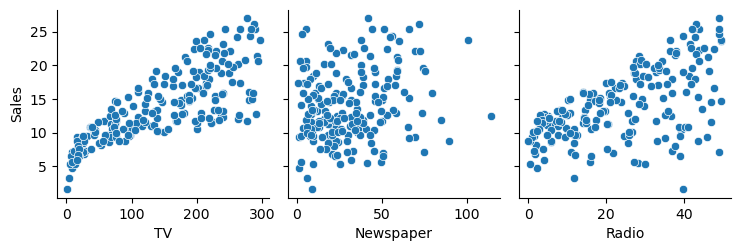

In [11]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

In [12]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


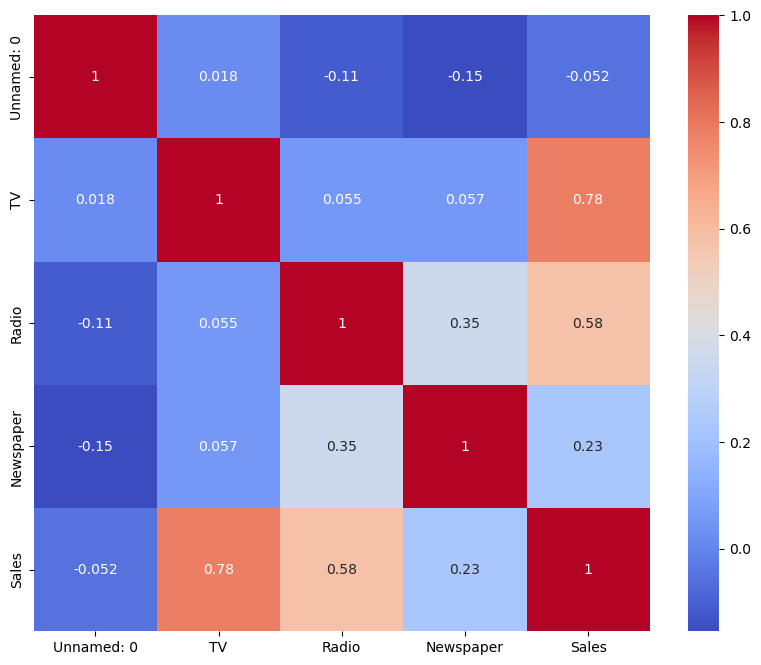

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()


# Dataset preperation for the Multiple-linear regression modeling

In [21]:
X=data[['TV','Radio']].values.reshape(-1,2)
Y=data['Sales']

In [22]:
type(X)

numpy.ndarray

In [23]:
X.shape

(200, 2)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [25]:
X_train.shape

(140, 2)

# Prepare model data point visualiazation

In [42]:
x = X[:,0]
y = X[:,1]
z = Y

x_pred = np.linspace(data['TV'].min(), data['TV'].max(), 30) # range of TV values
y_pred = np.linspace(data['Radio'].min(), data['Radio'].max(), 30) # range of Radio values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Training

In [43]:
#Create a Linear Regression Model
mod = LinearRegression()
model = mod.fit(X,Y)
predicted = model.predict(model_viz)

In [44]:
print(x_pred)

[  0.7         10.89655172  21.09310345  31.28965517  41.4862069
  51.68275862  61.87931034  72.07586207  82.27241379  92.46896552
 102.66551724 112.86206897 123.05862069 133.25517241 143.45172414
 153.64827586 163.84482759 174.04137931 184.23793103 194.43448276
 204.63103448 214.82758621 225.02413793 235.22068966 245.41724138
 255.6137931  265.81034483 276.00689655 286.20344828 296.4       ]


# Prediction

In [45]:
# Make predictions on the test set
y_pred = model.predict([[20,30]])

In [46]:
print(y_pred) 

[9.47602301]


In [31]:
# Make predictions on the test set
#y_pred = model.predict(x_test)

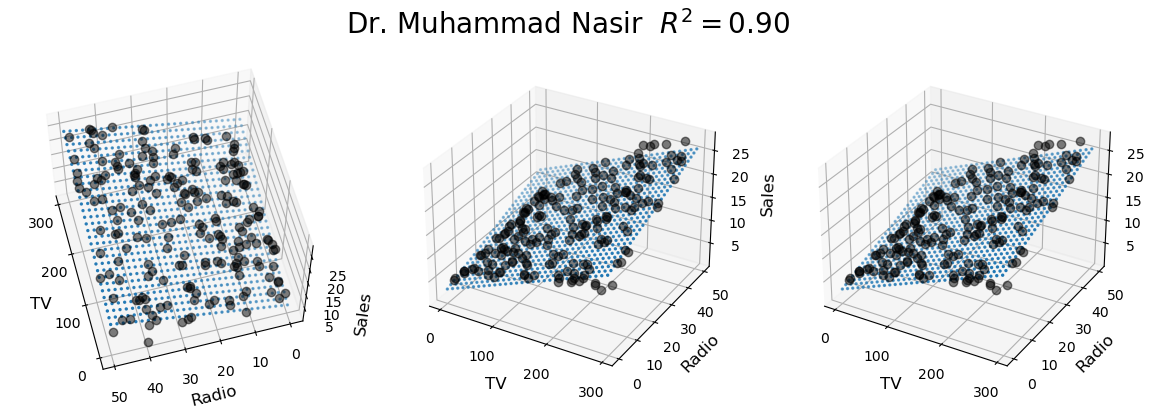

In [52]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x,y,z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=2)
    ax.set_xlabel('TV', fontsize=12)
    ax.set_ylabel('Radio', fontsize=12)
    ax.set_zlabel('Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax1.view_init(elev=4, azim=114)
ax1.view_init(elev=60, azim=165)
r2 = model.score(X,Y)
    
#'    

fig.suptitle('Dr. Muhammad Nasir  '+'$R^2=%.2f$' % r2, fontsize=20)
fig.tight_layout()

# Evaluation

In [48]:
# Evaluating the model (Evaluation meterics MSe, R-Squred, SSE etc...)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [60, 1]

In [41]:
print("Mean Squred Error:", mse)
print("R^2 score:", r2)

NameError: name 'mse' is not defined

# Plotting